In [ ]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

In [2]:
# Carregamento do dataset
df_tempodist = pd.read_csv('../data/tempodist.csv', delimiter=',')
df_tempodist

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [15]:
# Estimação do modelo de regressão linear simples

# Estimação do modelo
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

In [16]:
modelo.params

Intercept    5.878378
distancia    1.418919
dtype: float64

In [17]:
modelo.rsquared

np.float64(0.8194256756756757)

In [18]:
# Somatorio dos quadrados do modelo (SQM)
modelo.ess

np.float64(1638.8513513513512)

In [19]:
# Soma dos erros ao quadrado (SQErro)
modelo.ssr

np.float64(361.14864864864865)

In [ ]:
# Cálculo da estatísitica F
n = modelo.nobs
graus_liberdade_modelo = modelo.df_model # Quantidade de Variáveis
graus_liberdade_dos_erros = modelo.df_resid # Quantidade de observações - 1 (intercepto) - 1 (quantidade de variáveis, 
                                     # pois não se pode ter uma convergência do modelo se tiver uma quantidade 
                                     # maior de colunas do que de linhas)

F = (modelo.ess / graus_liberdade_modelo) / (modelo.ssr / graus_liberdade_dos_erros)
F

np.float64(36.30308699719364)

In [23]:
# Anova (Anaçysis of Variance)
# Outra forma de obter a estatística F

from statsmodels.stats.anova import anova_lm
anova_lm(modelo)

,df,sum_sq,mean_sq,F,PR(>F)
distancia,1.0,1638.851351,1638.851351,36.303087,0.000314
Residual,8.0,361.148649,45.143581,NaN,NaN


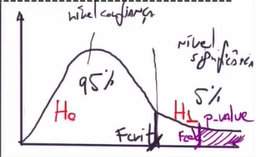

 - Quando F Calculado for maior que o F Crítico: H1 - p-value menor que 0,05
    
    ```Nesse caso pelo menos um beta será estatísticamente diferente de zero a 95% de nível de confiança```
    
    **<span style="color: red;">Há Modelo!!!!!</span>**

 - Em contrapartida, se o F Calculado for menor que o F Crítico: H0
    
    ```Nesse caso p-value será maior que 0,05, portanto beta1=beta2=...=betak=0```

    **<span style="color: red;">Não Há Modelo!!!!!</span>**

In [24]:
# Definição do p-value associado ao F Calculado
from scipy.stats import f

1 - f.cdf(F, graus_liberdade_modelo, graus_liberdade_dos_erros)

np.float64(0.0003144488029083181)

*Portando, p-value < 0.05, há modelo!!*

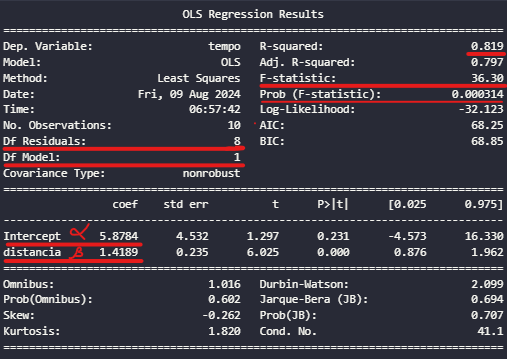

In [28]:
# Cálculo do F Crítico

f.ppf(0.95, graus_liberdade_modelo, graus_liberdade_dos_erros)

np.float64(5.317655071578712)

F Crítico muito abaixo do F Calculado (36,30)

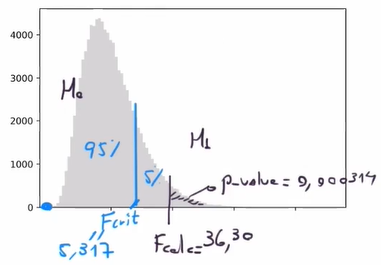